In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [55]:
df = pd.read_csv("/content/gen.csv")

In [56]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [57]:
X = df.iloc[:, 3:13]
y = df.iloc[:, 13]
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [58]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [59]:
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)
geography,gender

(      Germany  Spain
 0           0      0
 1           0      1
 2           0      0
 3           0      0
 4           0      1
 ...       ...    ...
 9995        0      0
 9996        0      0
 9997        0      0
 9998        1      0
 9999        0      0
 
 [10000 rows x 2 columns],       Male
 0        0
 1        0
 2        0
 3        0
 4        0
 ...    ...
 9995     1
 9996     1
 9997     0
 9998     1
 9999     0
 
 [10000 rows x 1 columns])

In [60]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [61]:
X=pd.concat([X,geography,gender],axis=1)
X=X.drop(['Geography','Gender'],axis=1)
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train, X_test

(      CreditScore  Age  Tenure  ...  Germany  Spain  Male
 7389          667   34       5  ...        0      1     0
 9275          427   42       1  ...        1      0     1
 2995          535   29       2  ...        0      0     0
 5316          654   40       5  ...        0      1     1
 356           850   57       8  ...        0      1     0
 ...           ...  ...     ...  ...      ...    ...   ...
 9225          594   32       4  ...        1      0     0
 4859          794   22       4  ...        0      1     0
 3264          738   35       5  ...        0      0     1
 9845          590   38       9  ...        0      1     0
 2732          623   48       1  ...        1      0     0
 
 [8000 rows x 11 columns],
       CreditScore  Age  Tenure  ...  Germany  Spain  Male
 9394          597   35       8  ...        1      0     0
 898           523   40       2  ...        0      0     0
 2398          706   42       8  ...        0      1     0
 5906          788   32    

In [63]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train, X_test

(array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
          1.74309049, -1.09168714],
        [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
         -0.57369368,  0.91601335],
        [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
         -0.57369368, -1.09168714],
        ...,
        [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
         -0.57369368,  0.91601335],
        [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
          1.74309049, -1.09168714],
        [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
         -0.57369368, -1.09168714]]),
 array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
         -0.57369368, -1.09168714],
        [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
         -0.57369368, -1.09168714],
        [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
          1.74309049, -1.09168714],
        ...,
        [-0.74791227, -0.27319958, -1.37744033, ..., -

In [64]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [65]:
classifier = Sequential()

classifier.add(Dense( 6,activation='relu',input_dim = 11))

classifier.add(Dense(6,  activation='relu'))
classifier.add(Dense(1, activation = 'sigmoid'))

classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)
print(model_history.history.keys())

Epoch 1/100
536/536 [==============================] - 1s 2ms/step - loss: 0.5666 - accuracy: 0.7980 - val_loss: 0.5193 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 1s 1ms/step - loss: 0.5160 - accuracy: 0.7889 - val_loss: 0.4975 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4878 - accuracy: 0.7980 - val_loss: 0.4846 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4769 - accuracy: 0.7952 - val_loss: 0.4736 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4620 - accuracy: 0.7984 - val_loss: 0.4647 - val_accuracy: 0.7955
Epoch 6/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4553 - accuracy: 0.7918 - val_loss: 0.4587 - val_accuracy: 0.7959
Epoch 7/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4636 - accuracy: 0.7854 - val_loss: 0.4540 - val_accuracy: 0.7970

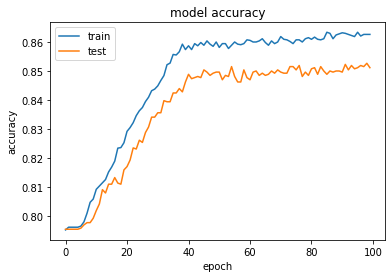

In [66]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

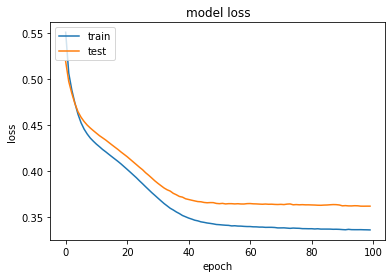

In [67]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [68]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [69]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1520,   75],
       [ 194,  211]])

In [70]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.8655